In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# TRX-USD

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/TRX-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.002241,0.002247,0.002057,0.002118,0.002118,6294070
1,2017-12-02,0.002110,0.002212,0.002032,0.002073,0.002073,5760180
2,2017-12-03,0.002080,0.002204,0.002034,0.002116,0.002116,7261200
3,2017-12-04,0.002124,0.002169,0.002049,0.002144,0.002144,10447300
4,2017-12-05,0.002139,0.002184,0.002058,0.002085,0.002085,8749920
...,...,...,...,...,...,...,...
2012,2023-06-05,0.081479,0.081775,0.077540,0.078347,0.078347,256099265
2013,2023-06-06,0.078347,0.079165,0.077531,0.078234,0.078234,244259894
2014,2023-06-07,0.078230,0.078808,0.076411,0.076741,0.076741,218146752
2015,2023-06-08,0.076742,0.077959,0.076245,0.077495,0.077495,160011052


In [4]:
# Chọn các cột cần thiết
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() # Loại bỏ các giá trị bị thiếu
df = df.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-4-4e2f5a330610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1


In [5]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [6]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.03413849942542834
Number of neighbors: 2, RMSE: 0.03442462096019018
Number of neighbors: 3, RMSE: 0.03618968823674041
Number of neighbors: 4, RMSE: 0.03580063975886765
Number of neighbors: 5, RMSE: 0.035145608093124454
Number of neighbors: 6, RMSE: 0.03471037188122679
Number of neighbors: 7, RMSE: 0.03449201980729823
Number of neighbors: 8, RMSE: 0.03400170353079053
Number of neighbors: 9, RMSE: 0.03378038630481457
Number of neighbors: 10, RMSE: 0.03347130667112212
Number of neighbors: 11, RMSE: 0.03331648123136321
Number of neighbors: 12, RMSE: 0.032756550853014106
Number of neighbors: 13, RMSE: 0.032022623497571366
Number of neighbors: 14, RMSE: 0.031199867186139763
Number of neighbors: 15, RMSE: 0.030677791688473132
Number of neighbors: 16, RMSE: 0.030320523711329397
Number of neighbors: 17, RMSE: 0.03017464396870991
Number of neighbors: 18, RMSE: 0.030133767249638434
Number of neighbors: 19, RMSE: 0.030448162069370125
Number of neighbors: 20, RMSE: 0

In [ ]:
# last_price = df['Close'].iloc[-1]
# print('Last Price:', last_price)

# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i, price in enumerate(y_next_30_days):
#     print(f"Day {i+1}: {price}")

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.02980946735318364
Validation RMSE: 0.030710226974955582
Validation MAPE: 48.70719467344359
Testing MAE: 0.023741703400368328
Testing RMSE: 0.025661434881072427
Testing MAPE: 36.380131801428305


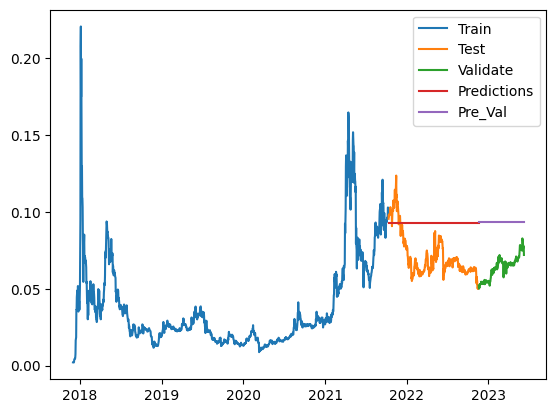

In [10]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

## Tỉ lệ 5:3:2

In [11]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [12]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 0.02517209102630543
Number of neighbors: 2, RMSE: 0.028405623267302813
Number of neighbors: 3, RMSE: 0.029457417341167805
Number of neighbors: 4, RMSE: 0.031257558753121584
Number of neighbors: 5, RMSE: 0.0327972508801417
Number of neighbors: 6, RMSE: 0.03413704026739299
Number of neighbors: 7, RMSE: 0.03524319499452217
Number of neighbors: 8, RMSE: 0.036181613508104594
Number of neighbors: 9, RMSE: 0.03684189657353965
Number of neighbors: 10, RMSE: 0.037430733587854786
Number of neighbors: 11, RMSE: 0.03773187600345659
Number of neighbors: 12, RMSE: 0.03803991415634614
Number of neighbors: 13, RMSE: 0.038248002746610124
Number of neighbors: 14, RMSE: 0.0384838341370732
Number of neighbors: 15, RMSE: 0.038478921862377315
Number of neighbors: 16, RMSE: 0.03853640265283358
Number of neighbors: 17, RMSE: 0.03845641084205074
Number of neighbors: 18, RMSE: 0.03829897840970332
Number of neighbors: 19, RMSE: 0.038270670267796146
Number of neighbors: 20, RMSE: 0.0

In [ ]:
# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i1, price1 in enumerate(y_next_30_days):
#     print(f"Day {i1+1}: {price1}")

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 0.03764403745863994
Validation RMSE: 0.03839255196287515
Validation MAPE: 57.166925982166696
Testing MAE: 0.03208812287400578
Testing RMSE: 0.03982729789684026
Testing MAPE: 44.58124565279497


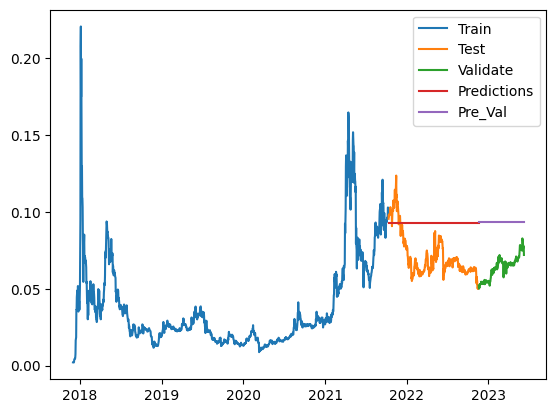

In [14]:
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

# DOGE

In [16]:
# Đọc dữ liệu từ file CSV
df2 = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/DOGE-USD.csv')
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.002051,0.002237,0.001971,0.002148,0.002148,5258110
1,2017-12-02,0.002122,0.002212,0.002017,0.002149,0.002149,4978180
2,2017-12-03,0.002092,0.002340,0.002071,0.002223,0.002223,4751640
3,2017-12-04,0.002206,0.002475,0.002178,0.002463,0.002463,6307150
4,2017-12-05,0.002474,0.002676,0.002426,0.002479,0.002479,8772420
...,...,...,...,...,...,...,...
2012,2023-06-05,0.072475,0.072632,0.064828,0.066573,0.066573,506101788
2013,2023-06-06,0.066568,0.071784,0.066112,0.070373,0.070373,428926152
2014,2023-06-07,0.070371,0.070371,0.066878,0.067300,0.067300,278793457
2015,2023-06-08,0.067302,0.068426,0.067154,0.067966,0.067966,167825308


In [17]:
# Chọn các cột cần thiết
df2 = df2[['Date', 'Close']]
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.dropna() # Loại bỏ các giá trị bị thiếu
df2 = df2.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-17-057164bac5b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])


## Tỉ lệ 7:2:1


In [18]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df2))
test_size = int(0.2 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size]
val_data = df2[train_size+test_size:]

In [19]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.15099235811521386
Number of neighbors: 2, RMSE: 0.15014479980586015
Number of neighbors: 3, RMSE: 0.1554500282645632
Number of neighbors: 4, RMSE: 0.15741767875122617
Number of neighbors: 5, RMSE: 0.15841299068912787
Number of neighbors: 6, RMSE: 0.1611086469298191
Number of neighbors: 7, RMSE: 0.16258942004114102
Number of neighbors: 8, RMSE: 0.16230654786220108
Number of neighbors: 9, RMSE: 0.15996702377209254
Number of neighbors: 10, RMSE: 0.15783438336420805
Number of neighbors: 11, RMSE: 0.15644146045225027
Number of neighbors: 12, RMSE: 0.15371941180417073
Number of neighbors: 13, RMSE: 0.15100403461696557
Number of neighbors: 14, RMSE: 0.14852895862439472
Number of neighbors: 15, RMSE: 0.14661412839225801
Number of neighbors: 16, RMSE: 0.14523193820151856
Number of neighbors: 17, RMSE: 0.14422834985083327
Number of neighbors: 18, RMSE: 0.14338126475198573
Number of neighbors: 19, RMSE: 0.14343136366252054
Number of neighbors: 20, RMSE: 0.143477750

In [ ]:
# last_price = df['Close'].iloc[-1]
# print('Last Price:', last_price)

# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i, price in enumerate(y_next_30_days):
#     print(f"Day {i+1}: {price}")

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.1432092060412973
Validation RMSE: 0.1434777504310768
Validation MAPE: 180.44044109281978
Testing MAE: 0.10621692490131525
Testing RMSE: 0.11722180931552367
Testing MAPE: 128.74273658993965


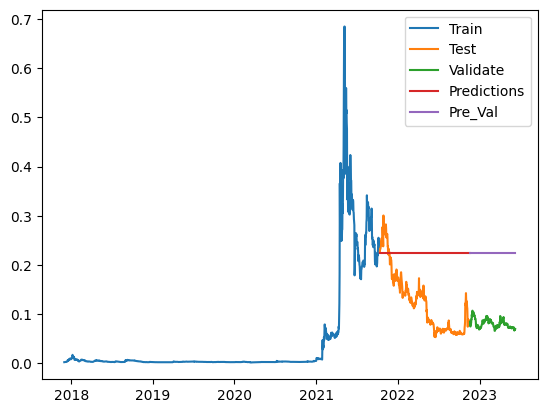

In [21]:
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])

## Tỉ lệ 5:3:2

In [22]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df2))
test_size1 = int(0.3 * len(df2))
val_size1 = len(df2) - train_size1 - test_size1

train_data1 = df2[:train_size1]
test_data1 = df2[train_size1:train_size1+test_size1]
val_data1 = df2[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [23]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 0.07628825502274464
Number of neighbors: 2, RMSE: 0.07613133549284684
Number of neighbors: 3, RMSE: 0.07603522860717735
Number of neighbors: 4, RMSE: 0.07599575754119405
Number of neighbors: 5, RMSE: 0.07595658150288777
Number of neighbors: 6, RMSE: 0.07593340638900237
Number of neighbors: 7, RMSE: 0.0759188141179636
Number of neighbors: 8, RMSE: 0.07591583731665441
Number of neighbors: 9, RMSE: 0.07590262655785746
Number of neighbors: 10, RMSE: 0.07589186189880494
Number of neighbors: 11, RMSE: 0.07587298130889655
Number of neighbors: 12, RMSE: 0.0758575744852951
Number of neighbors: 13, RMSE: 0.07584242606946819
Number of neighbors: 14, RMSE: 0.07583287373532055
Number of neighbors: 15, RMSE: 0.07582028067298215
Number of neighbors: 16, RMSE: 0.07581140674834527
Number of neighbors: 17, RMSE: 0.07579838577485692
Number of neighbors: 18, RMSE: 0.07578261716398837
Number of neighbors: 19, RMSE: 0.0757719661456557
Number of neighbors: 20, RMSE: 0.0757616448

In [ ]:
# # In kết quả dự đoán 30 ngày tiếp theo
# print('Predicted closing prices for the next 30 days:')
# for i1, price1 in enumerate(y_next_30_days):
#     print(f"Day {i1+1}: {price1}")

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 0.07428550742391388
Validation RMSE: 0.07576164489916774
Validation MAPE: 95.5612122172519
Testing MAE: 0.14919020998168525
Testing RMSE: 0.19486049860377916
Testing MAPE: 80.67473803487816


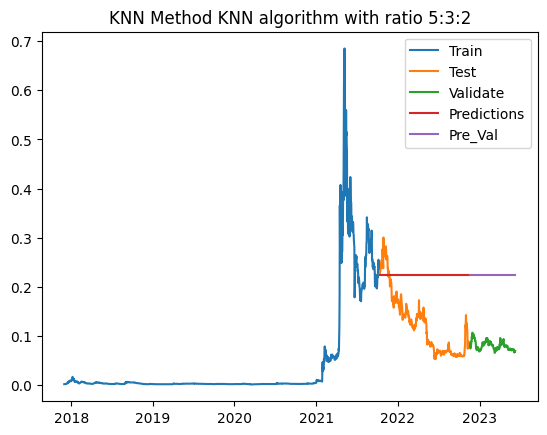

In [27]:
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])
ax.set_title('KNN Method KNN algorithm with ratio 5:3:2')
plt.show()

# XRP-USD


In [30]:
# Đọc dữ liệu từ file CSV
df3 = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/XRP-USD.csv')
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,0.250352,0.258828,0.239438,0.255699,0.255699,182992000
1,2017-12-02,0.255656,0.259218,0.250756,0.255492,0.255492,118250000
2,2017-12-03,0.255530,0.263072,0.247391,0.252558,0.252558,134710000
3,2017-12-04,0.252919,0.255362,0.247160,0.253571,0.253571,104650000
4,2017-12-05,0.253598,0.253988,0.245234,0.246101,0.246101,174591008
...,...,...,...,...,...,...,...
2012,2023-06-05,0.536006,0.541433,0.493546,0.510394,0.510394,2077075618
2013,2023-06-06,0.510383,0.531809,0.498234,0.530464,0.530464,1595950808
2014,2023-06-07,0.530428,0.537123,0.508934,0.519628,0.519628,1649651366
2015,2023-06-08,0.519612,0.527333,0.516962,0.524546,0.524546,954016646


In [31]:
# Chọn các cột cần thiết
df3 = df3[['Date', 'Close']]
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3.dropna() # Loại bỏ các giá trị bị thiếu
df3 = df3.reset_index(drop=True) # Đặt lại chỉ số

<ipython-input-31-fb7dd3efecc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date'])


## Tỉ lệ 7:2:1


In [32]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size = int(0.7 * len(df3))
test_size = int(0.2 * len(df3))
val_size = len(df3) - train_size - test_size

train_data = df3[:train_size]
test_data = df3[train_size:train_size+test_size]
val_data = df3[train_size+test_size:]

In [33]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số láng giềng phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

        # Dự đoán giá trị cho tập kiểm tra
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Close'])
        y_pred = model.predict(x_test)

        # Dự đoán giá trị cho 30 ngày tiếp theo
        last_index = df.index[-1]
        last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
        x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
        y_next_30_days = model.predict(x_next_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 0.7192476158471763
Number of neighbors: 2, RMSE: 0.7195292617654033
Number of neighbors: 3, RMSE: 0.7267587640116331
Number of neighbors: 4, RMSE: 0.7061907423018134
Number of neighbors: 5, RMSE: 0.694875330266787
Number of neighbors: 6, RMSE: 0.6889319545624291
Number of neighbors: 7, RMSE: 0.6858040438349942
Number of neighbors: 8, RMSE: 0.6781642877294405
Number of neighbors: 9, RMSE: 0.6735696399461993
Number of neighbors: 10, RMSE: 0.6682505136612997
Number of neighbors: 11, RMSE: 0.6642564210400791
Number of neighbors: 12, RMSE: 0.6534571463040971
Number of neighbors: 13, RMSE: 0.6424594038252185
Number of neighbors: 14, RMSE: 0.630568228584359
Number of neighbors: 15, RMSE: 0.6222553991294245
Number of neighbors: 16, RMSE: 0.6162915884123641
Number of neighbors: 17, RMSE: 0.6108319067910264
Number of neighbors: 18, RMSE: 0.6062326497335347
Number of neighbors: 19, RMSE: 0.6050581842168498
Number of neighbors: 20, RMSE: 0.6041025312454141
Best k: 20


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Tính toán MAE và RMSE cho tập testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính toán MAPE cho tập validation và testing
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In kết quả
print('Validation MAE:', mae_val)
print('Validation RMSE:', rmse_val)
print('Validation MAPE:', mape_val)

print('Testing MAE:', mae_test)
print('Testing RMSE:', rmse_test)
print('Testing MAPE:', mape_test)


Validation MAE: 0.6014321528485257
Validation RMSE: 0.6041025312454141
Validation MAPE: 147.12471448365721
Testing MAE: 0.41604548289669363
Testing RMSE: 0.4726633869242403
Testing MAPE: 94.94797635459449


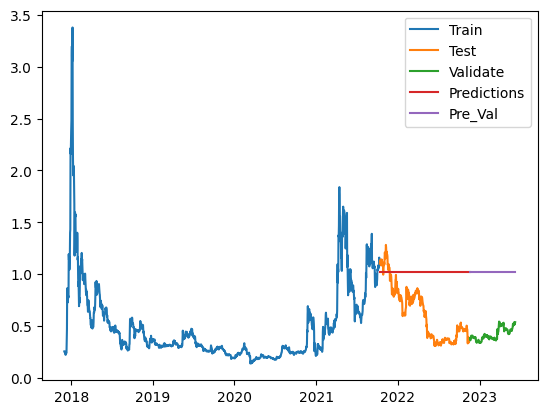

In [35]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])
plt.show()

## Tỉ lệ 5:3:2

In [36]:
# Tách dữ liệu thành tập huấn luyện, tập kiểm tra và tập xác thực
train_size1 = int(0.5 * len(df3))
test_size1 = int(0.3 * len(df3))
val_size1 = len(df3) - train_size1 - test_size1

train_data1 = df3[:train_size1]
test_data1 = df3[train_size1:train_size1+test_size1]
val_data1 = df3[train_size1+test_size1:]

# Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [37]:
# Tìm số láng giềng phù hợp
best_k1 = None
best_rmse1 = float('inf')

for k1 in range(1, 21):
    # Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k1)
    model.fit(x_train1, y_train1)

    # Dự đoán giá trị cho tập xác thực
    x_val1 = np.array(val_data1.index).reshape(-1, 1)
    y_val1 = np.array(val_data1['Close'])
    y_pred_val1 = model.predict(x_val1)

    # Tính toán RMSE
    rmse1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

    # In số láng giềng và RMSE
    print(f"Number of neighbors: {k1}, RMSE: {rmse1}")

    # Lưu lại số láng giềng và RMSE tốt nhất
    if rmse1 < best_rmse1:
        best_k1 = k1
        best_rmse1 = rmse1

# Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k1)
model.fit(x_train1, y_train1)

# Dự đoán giá trị cho tập kiểm tra
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(x_test1)

# Dự đoán giá trị cho 30 ngày tiếp theo
last_index1 = df.index[-1]
last_data1 = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)
y_next1_30_days = model.predict(x_next1_30_days)

# In số láng giềng và RMSE tốt nhất
print('Best k:', best_k1)
print('Best RMSE:', best_rmse1)

Number of neighbors: 1, RMSE: 0.17563733127651776
Number of neighbors: 2, RMSE: 0.1618097254732713
Number of neighbors: 3, RMSE: 0.15140860456214106
Number of neighbors: 4, RMSE: 0.1494044493755114
Number of neighbors: 5, RMSE: 0.1479759859678666
Number of neighbors: 6, RMSE: 0.14830842738110991
Number of neighbors: 7, RMSE: 0.14886222815808994
Number of neighbors: 8, RMSE: 0.15012983548152425
Number of neighbors: 9, RMSE: 0.14981140379710256
Number of neighbors: 10, RMSE: 0.14951733815653925
Number of neighbors: 11, RMSE: 0.14834986699258715
Number of neighbors: 12, RMSE: 0.1476662268907217
Number of neighbors: 13, RMSE: 0.14700794557180005
Number of neighbors: 14, RMSE: 0.14682132967123865
Number of neighbors: 15, RMSE: 0.14594634936384718
Number of neighbors: 16, RMSE: 0.1453123952621743
Number of neighbors: 17, RMSE: 0.14406442177089396
Number of neighbors: 18, RMSE: 0.14238794009104294
Number of neighbors: 19, RMSE: 0.14142139272394597
Number of neighbors: 20, RMSE: 0.140723622689

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính toán MAE và RMSE cho tập validation
mae_val1 = mean_absolute_error(y_val1, y_pred_val1)
rmse_val1 = np.sqrt(mean_squared_error(y_val1, y_pred_val1))

# Tính toán MAE và RMSE cho tập testing
mae_test1 = mean_absolute_error(y_test1, y_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Tính toán MAPE cho tập validation và testing
mape_val1 = np.mean(np.abs((y_val1 - y_pred_val1) / y_val1)) * 100
mape_test1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100

# In kết quả
print('Validation MAE:', mae_val1)
print('Validation RMSE:', rmse_val1)
print('Validation MAPE:', mape_val1)

print('Testing MAE:', mae_test1)
print('Testing RMSE:', rmse_test1)
print('Testing MAPE:', mape_test1)


Validation MAE: 0.12541163096038419
Validation RMSE: 0.1407236226899144
Validation MAPE: 28.988399665396337
Testing MAE: 0.46690053366678796
Testing RMSE: 0.5724197807163652
Testing MAPE: 53.44111725812406


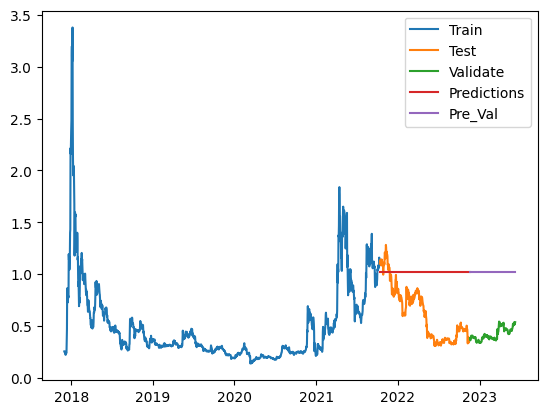

In [39]:
# Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.legend(['Train', 'Test', 'Validate', 'Predictions', 'Pre_Val'])